In [1]:
# API import from https://www.worldweatheronline.com/developer/my/
# https://github.com/ekapope/WorldWeatherOnline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [2]:
# pip install wwo-hist

In [3]:
# from wwo_hist import retrieve_hist_data


In [4]:
# import os
# os.chdir("/Users/trevorban/Desktop/zri-data")

In [5]:
# frequency=24
# start_date = '01-JAN-2012'
# end_date = '1-AUG-2021'
# api_key = 'ee4014fae66d49c88f3232552211409'
# location_list = ['austin_texas', 'san_antonio_texas', 'dallas_texas', 'houston_texas', 'el_paso_texas']

# hist_weather_data = retrieve_hist_data(api_key,
#                                 location_list,
#                                 start_date,
#                                 end_date,
#                                 frequency,
#                                 location_label = False,
#                                 export_csv = True,
#                                 store_df = True)

In [6]:
# load datasets to pd df
dallas_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/dallas_texas.csv')
elpaso_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/el_paso_texas.csv')
houston_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/houston_texas.csv')
sanantonio_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/san_antonio_texas.csv')
austin_raw = pd.read_csv('/Users/trevorban/Desktop/zri-data/austin_texas.csv')

In [7]:
# copy, keep an original
dallas = dallas_raw.copy()
houston = houston_raw.copy()
sanan = sanantonio_raw.copy()
elpaso = elpaso_raw.copy()
austin = austin_raw.copy()

In [8]:
dallas.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2012-01-01,13,6,0.0,10.0,3,48,01:10 PM,01:38 AM,08:29 AM,06:32 PM,0,6,9,6,31,0,53,0.0,1031,13,10,335,19,dallas_texas
1,2012-01-02,10,4,0.0,10.0,3,55,01:42 PM,02:32 AM,08:30 AM,06:32 PM,-2,4,7,4,20,0,53,0.0,1038,10,10,262,13,dallas_texas
2,2012-01-03,12,5,0.0,10.0,3,62,02:17 PM,03:27 AM,08:30 AM,06:33 PM,-1,5,7,5,21,0,55,0.0,1031,12,10,188,14,dallas_texas
3,2012-01-04,14,5,0.0,10.0,4,70,02:56 PM,04:21 AM,08:30 AM,06:34 PM,3,7,9,7,21,11,65,0.0,1025,14,10,200,11,dallas_texas
4,2012-01-05,15,7,0.0,10.1,4,77,03:40 PM,05:16 AM,08:30 AM,06:35 PM,5,11,12,11,13,0,67,0.0,1024,15,10,176,8,dallas_texas


In [9]:
# limit columns to data of interest
dallas = dallas[['date_time', 'maxtempC', 'mintempC', 'precipMM', 'location']]
houston = houston[['date_time', 'maxtempC', 'mintempC', 'precipMM', 'location']]
sanan = sanan[['date_time', 'maxtempC', 'mintempC', 'precipMM', 'location']]
elpaso = elpaso[['date_time', 'maxtempC', 'mintempC', 'precipMM', 'location']]
austin = austin[['date_time', 'maxtempC', 'mintempC', 'precipMM', 'location']]

In [10]:
# clarify location
dallas['location'] = 'dallas'
houston['location'] = 'houston'
sanan['location'] = 'san_antonio'
elpaso['location'] = 'el_paso'
austin['location'] = 'austin'

In [11]:
# change date to datetime
dallas.date_time = pd.to_datetime(dallas.date_time)
houston.date_time = pd.to_datetime(houston.date_time)
sanan.date_time = pd.to_datetime(sanan.date_time)
elpaso.date_time = pd.to_datetime(elpaso.date_time)
austin.date_time = pd.to_datetime(austin.date_time)

In [12]:
print('------------dallas------------')
print(dallas.dtypes)
print(dallas.shape)
print('------------houston------------')
print(houston.dtypes)
print(houston.shape)
print('------------sanan------------')
print(sanan.dtypes)
print(sanan.shape)
print('------------elpaso------------')
print(elpaso.dtypes)
print(elpaso.shape)
print('------------austin------------')
print(austin.dtypes)
print(austin.shape)

------------dallas------------
date_time    datetime64[ns]
maxtempC              int64
mintempC              int64
precipMM            float64
location             object
dtype: object
(3501, 5)
------------houston------------
date_time    datetime64[ns]
maxtempC              int64
mintempC              int64
precipMM            float64
location             object
dtype: object
(3501, 5)
------------sanan------------
date_time    datetime64[ns]
maxtempC              int64
mintempC              int64
precipMM            float64
location             object
dtype: object
(3501, 5)
------------elpaso------------
date_time    datetime64[ns]
maxtempC              int64
mintempC              int64
precipMM            float64
location             object
dtype: object
(3501, 5)
------------austin------------
date_time    datetime64[ns]
maxtempC              int64
mintempC              int64
precipMM            float64
location             object
dtype: object
(3501, 5)


In [13]:
weather = houston.append(dallas).append(elpaso).append(austin).append(sanan).sort_values(by='date_time').rename(columns={'location':'city'})

In [14]:
weather

,date_time,maxtempC,mintempC,precipMM,city
0,2012-01-01,17,10,0.6,houston
0,2012-01-01,14,7,0.0,austin
0,2012-01-01,12,4,0.0,el_paso
0,2012-01-01,13,6,0.0,dallas
0,2012-01-01,16,9,0.0,san_antonio
...,...,...,...,...,...
3500,2021-08-01,33,27,1.3,el_paso
3500,2021-08-01,38,29,0.1,dallas
3500,2021-08-01,35,27,0.8,houston
3500,2021-08-01,35,26,0.9,austin


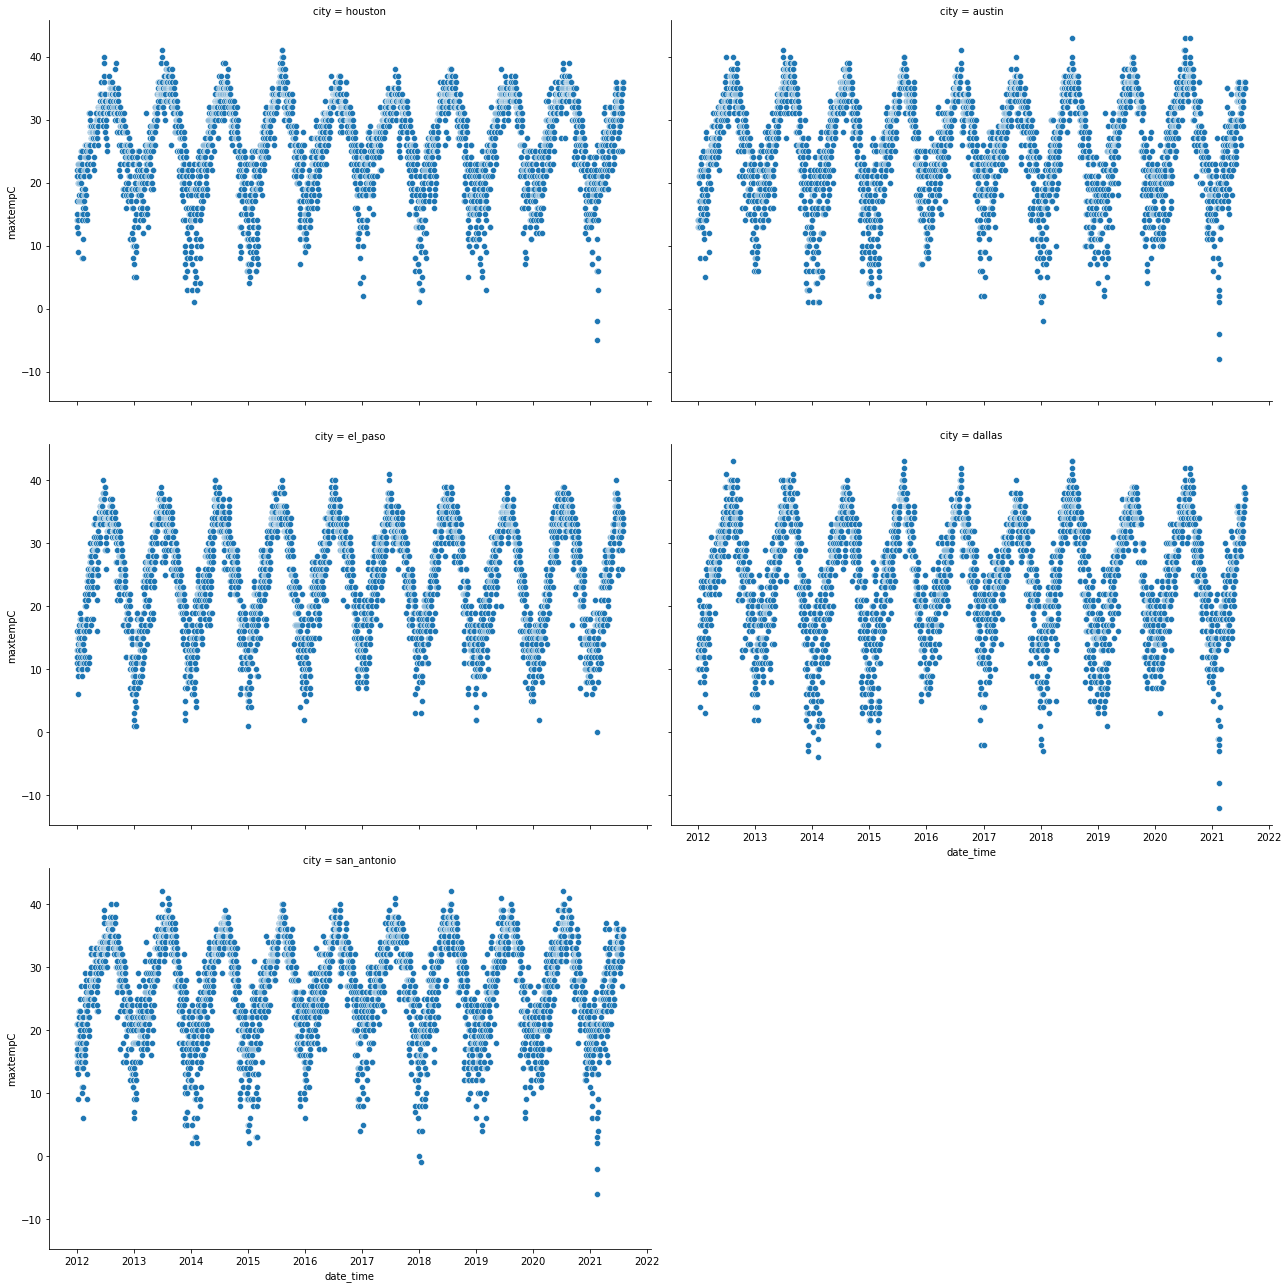

In [15]:
#define grid
g = sns.FacetGrid(data=weather, col='city', col_wrap=2, height=6, aspect=1.5)

#add plots to grid
fig = g.map(sns.scatterplot, 'date_time', 'maxtempC')

In [16]:
# change to month and day (unfortunately, once converted to datetime object, it includes the day again, just 01)
weather.loc[:, 'date_time'] = weather.loc[:, 'date_time'].dt.strftime('%m/%Y')
weather.loc[:, 'date_time'] = pd.to_datetime(weather.loc[:, 'date_time'])
weather

,date_time,maxtempC,mintempC,precipMM,city
0,2012-01-01,17,10,0.6,houston
0,2012-01-01,14,7,0.0,austin
0,2012-01-01,12,4,0.0,el_paso
0,2012-01-01,13,6,0.0,dallas
0,2012-01-01,16,9,0.0,san_antonio
...,...,...,...,...,...
3500,2021-08-01,33,27,1.3,el_paso
3500,2021-08-01,38,29,0.1,dallas
3500,2021-08-01,35,27,0.8,houston
3500,2021-08-01,35,26,0.9,austin


In [17]:
# groupby date and location to find mean values for each location and month
weather = weather.groupby(['date_time', 'city']).agg({'maxtempC': 'mean', 'mintempC': 'mean', 'precipMM': 'mean'}).reset_index()

In [18]:
# beautiful
weather

,date_time,city,maxtempC,mintempC,precipMM
0,2012-01-01,austin,16.967742,6.806452,2.419355
1,2012-01-01,dallas,15.193548,5.967742,3.735484
2,2012-01-01,el_paso,13.709677,5.161290,0.025806
3,2012-01-01,houston,18.612903,10.129032,2.567742
4,2012-01-01,san_antonio,18.322581,8.645161,2.770968
...,...,...,...,...,...
575,2021-08-01,austin,35.000000,26.000000,0.900000
576,2021-08-01,dallas,38.000000,29.000000,0.100000
577,2021-08-01,el_paso,33.000000,27.000000,1.300000
578,2021-08-01,houston,35.000000,27.000000,0.800000


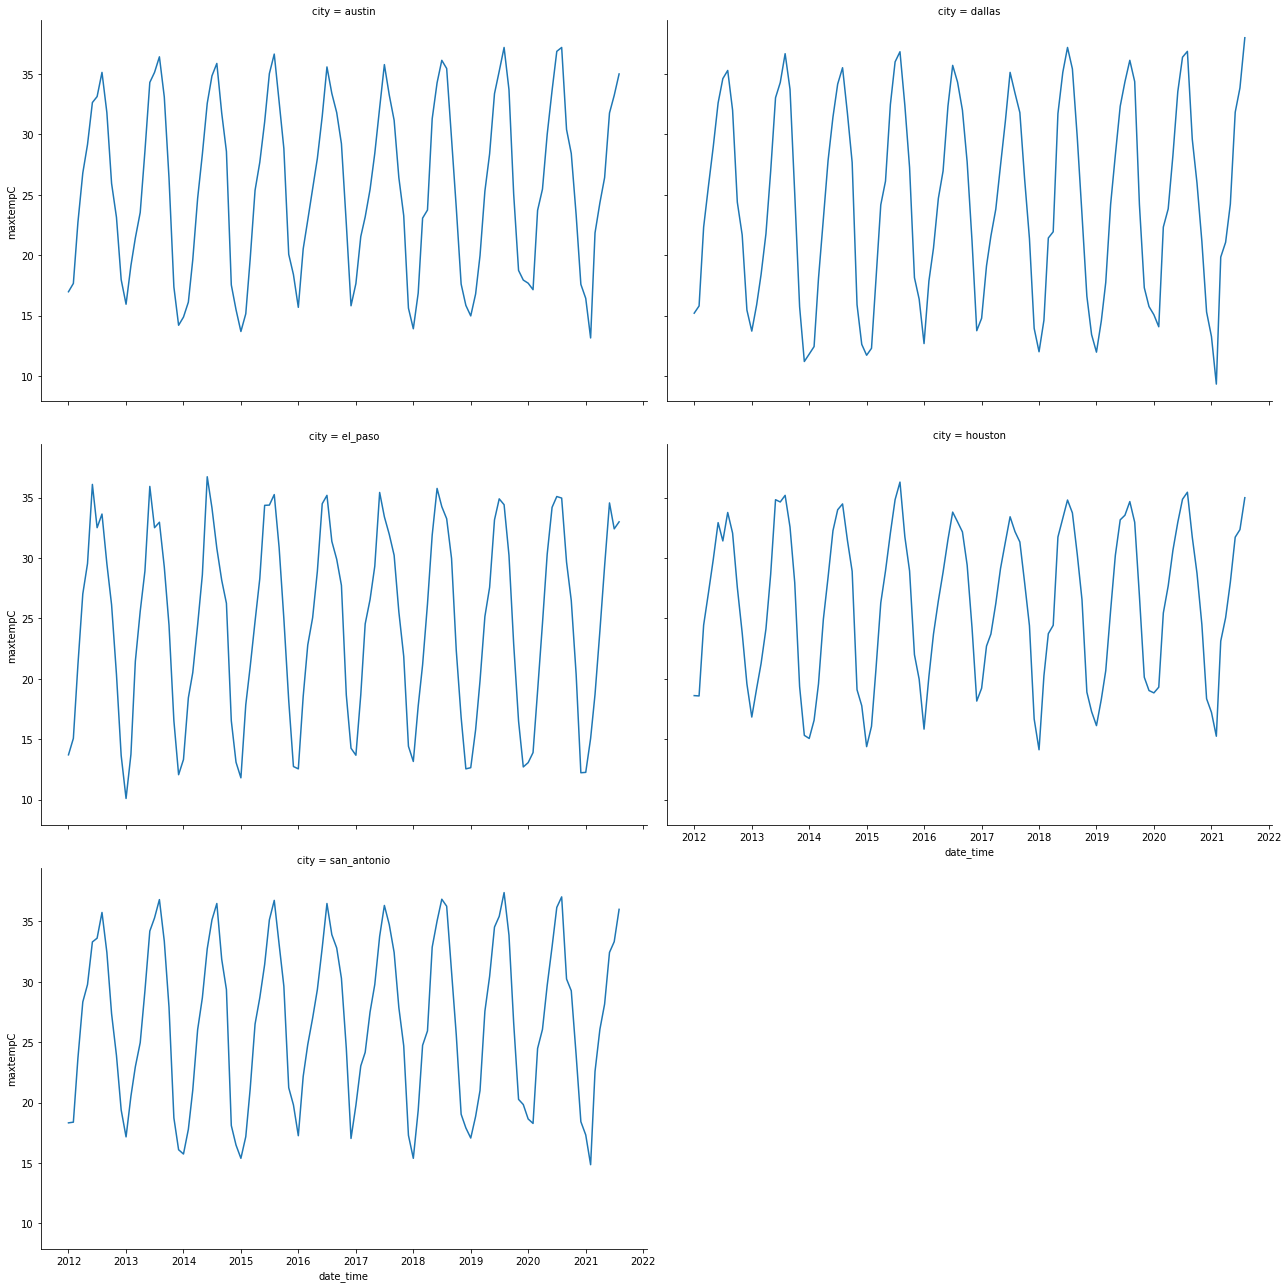

In [19]:
#define grid
g = sns.FacetGrid(data=weather, col='city', col_wrap=2, height=6, aspect=1.5)

#add plots to grid
fig = g.map(sns.lineplot, 'date_time', 'maxtempC')